### <img src='img/fastcamp_h.png'>

# 6강. Deep Learning from Basic Method 3 with Keras

# 더욱 바른 학습을 위한 여정

* 위의 많은 처리 방법으로 본격적인 deep learning의 시대가 도래함
* 그것을 보조하는 연구들이 연타로 나와 점점 성능이 좋아지게 됨
* DL에서는 이전 ML기법에서 많은 문제가 되던 오버피팅 문제를 손쉽게 개선할 수 있다.

# What is Overfitting and Underfitting

* 집값을 예측한다고 쳐보자
* 평형이 커질때마다 집값이 상승한다고 가정한 그래프는 다음과 같음
* 사이즈가 증가할 수록 집값은 로그로 증가한다고 가정

<center><img src='img/05_20.png' width=50% height=50%></center>

# Underfitting

* 주어진 문제에 대비하여 모델이 지나치게 간단하게 구성된 경우
* 문제에 대한 정확한 정답을 내지못함
* 대충 결과가 나온다와 같은 느낌을 줄 수 있음

<center><img src='img/05_21.png' width=50% height=50%></center>

# Underfitting 해결 방법

* underfitting은 크게 2가지의 방식으로 해결 될 수 있음

* 모델이 실제 데이터에 비하여 지나치게 단순한 경우
 * 모델의 복잡도를 높인다 (layer를 더 추가한다)
  
* 실제 데이터는 비선형이었지만 학습셋이 부족했던 경우
 * 학습셋이 너무 적어 주어진 문제를 올바로 표현하지 못했던 경우
 * 학습데이터를 더 수집한다

# 잘 학습된 경우

<center><img src='img/05_22.png' width=50% height=50%></center>

# Overfitting

* 주어진 문제에 대비하여 지나치게 loss를 줄이는 방향으로 fitting된 경우
* 학습셋에 대해서는 엄청나게 정확한 결과를 내지만 실제 데이터에서 성능이 떨어
* 학습셋에 비하여 성능이 나쁘다라는 느낌을 주게 됨

<center><img src='img/05_23.png' width=50% height=50%></center>

# Overfitting 해결 방법

* overfitting은 여러가지 방법으로 개선될 수 있음
<br><br>
* 학습데이터를 현실 문제에 최대한 근접하게 모음
* 입력하는 학습 데이터의 분포를 편향되지 않게 함
* early stopping을 통하여 overfitting이 발생하기전에 모델 학습을 종료 시킴
* regularization을 통하여 $w$에 대한 제약을 가함

# Classification의 overfitting, underfitting
<br><br>
<center><img src='img/05_24.png' width=100% height=100%></center>

# 딥러닝 학습 방법 by iris 데이터

* 붓꽃의 꽃잎(petal), 꽃받침(sepal) 데이터를 통하여 해당 데이터가 붓꽃의 어느종인지 맞추는 문제
* 붓꽃은 다음과 같이 생긴 꽃임

<center><img src='img/06_01.png' width=20% height=20%></center>

* petal과 sepal의 길이와 너비 정보가 주어짐
* petal 정보 2개 (width, length)
* sepal 정보 2개 (width, length)

<center><img src='img/06_02.png' width=20% height=20%></center>

* 꽃의 3타입은 다음과 같이 생겼음

<center><img src='img/06_04.png' width=50% height=50%></center>

In [1]:
import seaborn as sns
import pandas as pd
# iris 데이터를 읽어옴
iris = sns.load_dataset("iris")    # 붓꽃 데이터
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [2]:
print(len(iris))
iris.head(5)

150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


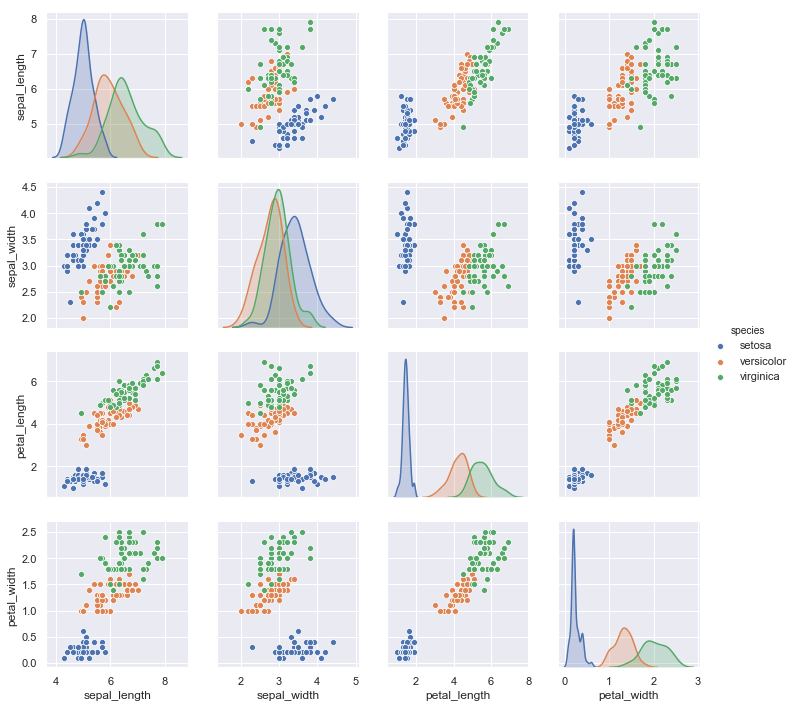

In [3]:
sns.set(rc={'figure.figsize':(10, 7)})
g = sns.pairplot(iris, hue="species")

In [4]:
#species를 기준으로 onehot encoding
onehot = pd.get_dummies(iris)
onehot.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# 원핫(one-hot encoding) 인코딩이란?

* 우리가 다루는 데이터는 크게 다음과 같은 종류가 있음
* 순서형까지는 대소비교를 통하여 딥러닝이 서로간의 관계를 찾을 수 있음
* 그러나 명목형의 경우는 수치적으로 의미가 있지 않음
    * DL이 계산 할 수 없음!
    
<center><img src='img/06_05.png' width=30% height=30%></center>

   
# 원핫 인코딩
* 범주형 데이터의 값을 column으로 변경하여 존재를 나타내는 방식

<center><img src='img/06_06.png' width=50% height=50%></center>

In [5]:
# 학습용 데이터와 테스트용 데이터를 분리
train = onehot.sample(frac=0.7)
test = onehot.drop(train.index)
print(len(onehot), len(train), len(test))

150 105 45


In [6]:
x_train = train.iloc[:,0:4]
x_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
37,4.9,3.6,1.4,0.1
96,5.7,2.9,4.2,1.3
45,4.8,3.0,1.4,0.3
44,5.1,3.8,1.9,0.4
19,5.1,3.8,1.5,0.3


In [7]:
y_train = train.iloc[:,4:]
y_train.head(5)

,species_setosa,species_versicolor,species_virginica
37,1,0,0
96,0,1,0
45,1,0,0
44,1,0,0
19,1,0,0


In [8]:
x_test = test.iloc[:,0:4]
x_test.head(5)

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
16,5.4,3.9,1.3,0.4
21,5.1,3.7,1.5,0.4
23,5.1,3.3,1.7,0.5


In [9]:
y_test = test.iloc[:,4:]
y_test.head(5)

,species_setosa,species_versicolor,species_virginica
13,1,0,0
14,1,0,0
16,1,0,0
21,1,0,0
23,1,0,0


In [10]:
#MinMaxScaler는 각 변수를 row별로 분석하여 최대 값으로 현재 값을 나눠주어 0~1사이로 값을 변경함
from sklearn.preprocessing import MinMaxScaler
x_minmaxer = MinMaxScaler()
y_minmaxer = MinMaxScaler()
x_minmaxer.fit(x_train)
y_minmaxer.fit(y_train)
x_columns = x_train.columns
y_columns = y_train.columns

C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
x_train = x_minmaxer.transform(x_train)
x_train = pd.DataFrame(x_train, columns=x_columns)
y_train = y_minmaxer.transform(y_train)
y_train = pd.DataFrame(y_train, columns=y_columns)

In [12]:
x_test = x_minmaxer.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x_columns)
y_test = y_minmaxer.transform(y_test)
y_test = pd.DataFrame(y_test, columns=y_columns)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(32,input_shape=(4,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 51        
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


# Iris Model
* 깊이가 4가 되어 꽤 깊은 모양
* 출력이 하나가 아닌 세개
  * 이 경우 출력은 길이 3짜리 vector가 됨

<center><img src='img/06_07.png' width=30% height=30%></center>

In [29]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, verbose=0)

In [18]:
#hist 객체가 가지고 있는 정보 내
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

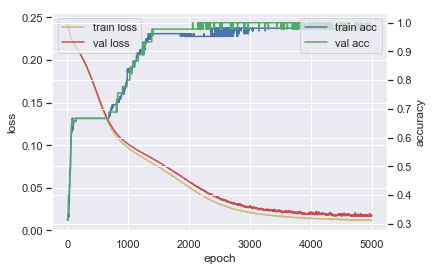

In [31]:
import matplotlib.pylab as plt

fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용
acc_ax = loss_ax.twinx()

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

#acc 축에 대하여 train/ val 세
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

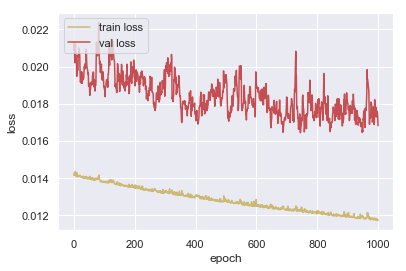

In [34]:
import matplotlib.pylab as plt

fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'][4000:], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'][4000:], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
plt.show()

# Overfitting과 Regularization

* 실제 데이터의 loss보다 학습 데이터의 loss가 더 작게 예측 되는 것은 학습에 대하여 과적합 되었기 때문
* epochs을 늘릴 수록 데이터에 대하여 여러 특징을 발견하며 loss를 줄이게 됨
 * 이러한 특징들은 학습 데이터에서만 나타나는 것일 수있음 (답안지를 외워서 응용을 못하는 경우)
 * 외웠다는 것은 어떤 가중치들이 너무 강한 존재력을 보인다는 것과 마찬가지
* regularization은 가중치들에게 핸디캡을 주어 강력한 존재력을 감소시키는 방향으로 동작함

# Dropout

* 사공이 많으면 배가 산으로 간다를 딥러닝으로 구현한 모듈
* mini batch가 수행되는 단위로 임의의 perceptron들의 출력을 0으로 만듬
* 특정 perceptron이 너무 막강해지는 것을 막으며 각 perceptron들이 서로서로 영향력을 나눠 갖어 일반화를 함
<center><img src='img/06_08.png' width=60% height=60%></center>

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(32,input_shape=(4,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='sigmoid'))
model.add(Dropout(0.3))

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, batch_size=32 validation_data=(x_test, y_test), epochs=5000, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 51        
__________

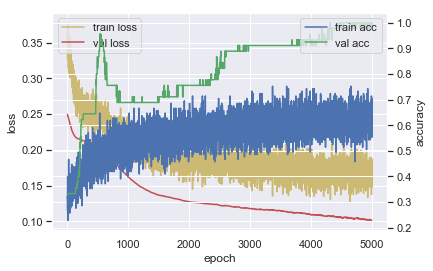

In [43]:
import matplotlib.pylab as plt

fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용
acc_ax = loss_ax.twinx()

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

#acc 축에 대하여 train/ val 세
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

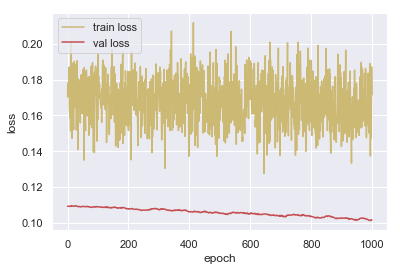

In [44]:
fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'][4000:], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'][4000:], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
plt.show()

# L1, L2 Regularization

* 과거 ML 시대때부터 Overfitting을 방지하는 전통적 기법

* 일반적인 loss는 다음과 같음

\begin{align}
loss &= L(Y, \hat{Y}) \nonumber \\
&= \sum_{i=1}^{n}(y_i - h(x_i))^2 \nonumber \\
&= \sum_{i=1}^{n}(y_i - h_\theta(x_i))^2 \nonumber
\end{align}

# L1, L2 Regularization

* loss를 줄이기 위해서 $\theta$들은 각각의 계수를 가지게 됨
* 계수가 강해지면 다음과 같은 현상이 나타남

<center><img src='img/05_23.png' width=30% height=30%></center>

# L2 Regularization

\begin{align}
loss &= L(Y, \hat{Y}) + R(\lambda) \nonumber \\
&= \sum_{i=1}^{n}(y_i - h_\theta(x_i))^2 + \lambda \sum_{i=1}^{n} \theta^2_i \nonumber
\end{align}

* 각 세타의 제곱의 합을 핸디캡으로 Loss에 추가
* \lambda를 통하여 어느정도의 세기로 핸디캡을 줄것인지 정함

# L1 Regularization

\begin{align}
loss &= L(Y, \hat{Y}) + R(\lambda) \nonumber \\
&= \sum_{i=1}^{n}(y_i - h_\theta(x_i))^2 + \lambda \sum_{i=1}^{n} |\theta_i| \nonumber
\end{align}

* 각 세타의 절대값의 합을 핸디캡으로 Loss에 추가
* \lambda를 통하여 어느정도의 세기로 핸디캡을 줄것인지 정함

In [56]:
#드롭아웃을 제거하고 l2 정규화를 넣은 모델
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import keras

model = Sequential()

model.add(Dense(32,input_shape=(4,),activation='relu', kernel_regularizer=keras.regularizers.l2(0.005)))
model.add(Dense(16,activation='relu', kernel_regularizer=keras.regularizers.l2(0.005)))
model.add(Dense(16,activation='relu', kernel_regularizer=keras.regularizers.l2(0.005)))
model.add(Dense(3,activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.005)))

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=5000, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_48 (Dense)             (None, 3)                 51        
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


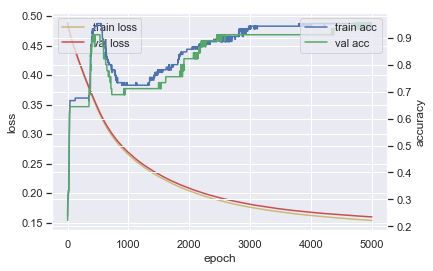

In [57]:
import matplotlib.pylab as plt

fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용
acc_ax = loss_ax.twinx()

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

#acc 축에 대하여 train/ val 세
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

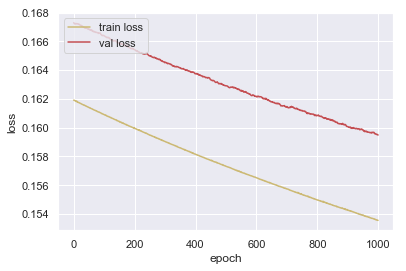

In [59]:
fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'][4000:], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'][4000:], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
plt.show()

In [60]:
#드롭아웃을 제거하고 l1 정규화를 넣은 모델
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import keras

model = Sequential()

model.add(Dense(32,input_shape=(4,),activation='relu', kernel_regularizer=keras.regularizers.l1(0.005)))
model.add(Dense(16,activation='relu', kernel_regularizer=keras.regularizers.l1(0.005)))
model.add(Dense(16,activation='relu', kernel_regularizer=keras.regularizers.l1(0.005)))
model.add(Dense(3,activation='sigmoid', kernel_regularizer=keras.regularizers.l1(0.005)))

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=5000, verbose=0)

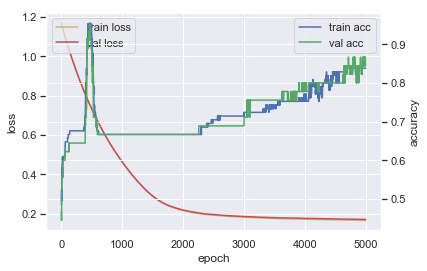

In [62]:
import matplotlib.pylab as plt

fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용
acc_ax = loss_ax.twinx()

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

#acc 축에 대하여 train/ val 세
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

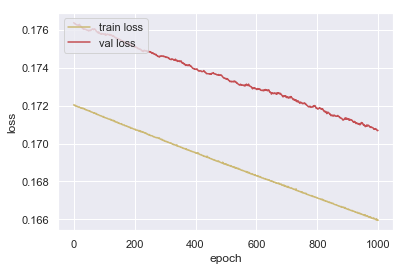

In [61]:
fig, loss_ax = plt.subplots(figsize=(6,4))
#x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용

#loss 축에 대하여 train과 val 세팅
loss_ax.plot(hist.history['loss'][4000:], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'][4000:], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
plt.show()

# Batch, Mini Batch 그리고 Epochs

* loss의 공식을 살펴보면 다음과 같음

\begin{align}
loss &= L(Y, \hat{Y}) \nonumber \\
&= \sum_{i=1}^{n}(y_i - h(x_i))^2 \nonumber \\
&= \sum_{i=1}^{n}(y_i - h_\theta(x_i))^2 \nonumber
\end{align}

* $\sum$의 범위 $n$은 어디까지인가?
 * 만약 $n$이 전체 학습셋
    * Batch를 통한 loss 개선을 Gradient Descent(GD)라고 함
<br><br>
 * 만약 $n$이 일부 학습셋
    * 해당 Batch는 mini batch라고 부름, loss 개선을 Stochastic Gradient Descent(SGD)라고 함
    * 원래 mini batch가 1인 경우를 SGD라고 하지만 보통은 mini batch를 포함하여 SGD라고 함
<br><br>    
* 모든 학습셋 범위를 한번 다 학습 시키는 것을 Epoch라고 함
 * 2 epochs는 모든 학습셋 범위를 2번 학습 시켰다는 의미

# Full Batch GD, Mini Batch GD, SGD 비교

* 학습데이터에서 어느정도의 사이즈로 어떻게 loss를 개선시킬지에 따라 수렴 시간이 달라짐
* 해당 분야를 Gradient Descent Method 혹은  Optimizer라는 주제로 연구
<center><img src='img/06_09.png' width=80% height=80%></center>

# Gradient Descent Methods


* Optimizer는 local optima를 어떻게해서든 해결해보려는 방식으로 발전해감
* 관성 개념을 도입 - 가던 방향으로 가는게 좋음
* 진폭 개념을 도입 - 가속도를 주거나 점점 느리게 가거나

<center><img src='img/06_10.png' width=70% height=70%></center>

# Optimizers in Deep Learning library
<center><img src='img/06_11.png' width=100% height=100%></center>